In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Q1

## (a) Sample X-Y

### Creating random dataset

In [2]:
# This makes sure that everytime same RANDOM NUMBERS are generated.
random.seed(123)
n = 50

X = np.random.uniform(0, 1, n)
Y = 2 + 3*X + np.random.normal(0, 0.1, n)

In [3]:
sample = {'X' : X,
       'Y': Y}

df = pd.DataFrame(sample)

# To make X and Y to 2D array
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1,1)
# Splitting the dataset into the specified value
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/4, random_state=0)

df.head()

,X,Y
0,0.807037,4.432364
1,0.382350,3.182871
2,0.235836,2.710485
3,0.189651,2.583838
4,0.893673,4.635307


In [4]:
# Creates an object of LinearRegression
slr = LinearRegression()

#### Training the Data

In [5]:
slr.fit(X_train, Y_train)

LinearRegression()

#### SLR coefficients

In [6]:
m = slr.coef_
m

array([[2.97429748]])

In [7]:
c = slr.intercept_
c

array([2.00986688])

#### Regression graph.

##### Trained Data 

In [8]:
# This is same as Y = mX + c
Y_pred_train = slr.predict(X_train)
Y_pred_train.flatten()

array([4.4888031 , 2.88123863, 2.67516653, 2.4358999 , 3.77687734,
       2.92141931, 2.66251624, 4.34802605, 2.41846038, 4.10889207,
       3.37096856, 2.26704144, 2.2087069 , 3.00391521, 3.03769491,
       4.66836252, 3.94880787, 4.02076586, 3.57901721, 3.69932593,
       3.25101834, 3.14708906, 3.04904   , 2.60798753, 2.40759842,
       4.96463455, 2.99161912, 2.58489534, 4.05006545, 4.91817918,
       3.08264632, 4.16329391, 2.46886198, 2.57394495, 4.41023442,
       3.56142873, 2.02123479])

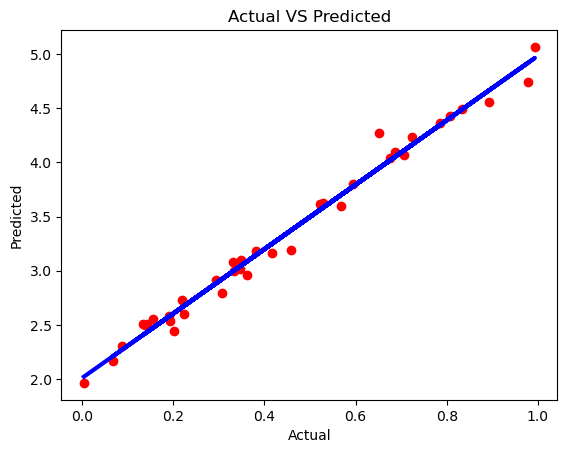

In [9]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, Y_pred_train, color='blue', linewidth=3)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')
plt.show()

###### R^2 test

In [10]:
r2_score(Y_train, Y_pred_train)

0.9858668416377347

##### Tested Data

In [11]:
Y_pred_test = slr.predict(X_test)
Y_pred_test.flatten()

array([2.58453493, 2.05250678, 2.08864009, 2.84080607, 2.71131269,
       4.30113082, 2.62678565, 2.9724298 , 2.39189449, 4.66791649,
       2.18470067, 2.58259388, 4.43468152])

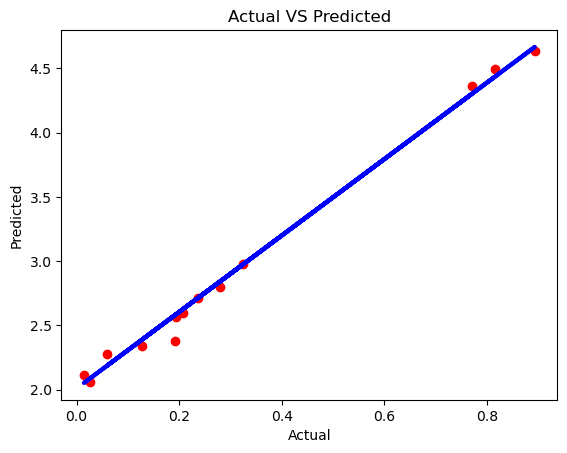

In [12]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, Y_pred_test, color='blue', linewidth=3)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')
plt.show()

###### R^2 test

In [13]:
r2_score(Y_test, Y_pred_test)

0.9931815567009422

#### Predicting output for new Datapoint


In [14]:
new_data = np.random.uniform(0,1,1)
new_data = [new_data]
slr.predict(new_data)

array([[2.66590458]])

In [15]:
# .ravel() is used to convert 2D arrays to 1D arrays

pred_df = pd.DataFrame({
    'Actual Value': Y_test.ravel(),
    'Predicted Value': Y_pred_test.ravel(),
    'difference': (Y_test - Y_pred_test).ravel()
})
pred_df

,Actual Value,Predicted Value,difference
0,2.564638,2.584535,-0.019897
1,2.115496,2.052507,0.062989
2,2.061614,2.088640,-0.027026
3,2.800874,2.840806,-0.039932
4,2.710485,2.711313,-0.000828
5,4.366598,4.301131,0.065467
6,2.596367,2.626786,-0.030419
7,2.979889,2.972430,0.007460
8,2.339749,2.391894,-0.052146
9,4.635307,4.667916,-0.032609


##### The difference is very less so this shows that our model is pretty accurate

#### SLR errors (inbuilt funcs)

In [16]:
# Mean Absolute Error
MAE = mean_absolute_error(Y_test, Y_pred_test)
MAE

0.05383270724852865

In [17]:
# Mean Squared Error
MSE = mean_squared_error(Y_test, Y_pred_test)
MSE

0.005368175357296228

In [18]:
RMSE = np.sqrt(MSE)
RMSE

0.07326783303262237

In [19]:
# Sum of Squared Residuals
SSR = ((Y_pred_test - Y_test)**2).sum()
SSR

0.06978627964485097

#### SLR errors (manually computed)

In [20]:
# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(Y_test - Y_pred_test))
mae

0.05383270724852865

In [21]:
# Calculate Mean Squared Error (MSE)
mse = np.mean((Y_test - Y_pred_test)**2)
mse

0.005368175357296228

In [22]:
# Calculate Sum of Squared Residuals (SSR)
ssr = np.sum((Y_pred_test - Y_test)**2)
ssr

0.06978627964485097

###### We can see that the manually computed MAE, MSE, SSR are equal to the ones that we Calculated using inbuilt functions

## (b) Student Marks

#### Generating Random Dataset

In [23]:
np.random.seed(123)

n = 50

X = np.random.randint(0, 50, n)
Y = 2 + 0.2*X + np.random.uniform(0, 1, n)
Y = Y / np.max(Y) * 10

In [24]:
sample = {'Marks' : X,
       'Grade': Y}

df = pd.DataFrame(sample)

# To make X and Y to 2D array
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1,1)

# Splitting the dataset into the specified value by test size
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/4, random_state=0)

df.head()

,Marks,Grade
0,45,9.189348
1,2,2.275185
2,28,6.504953
3,34,7.414866
4,38,7.966556


In [25]:
slr = LinearRegression()

#### Training the data

In [26]:
slr.fit(X_train, Y_train)

LinearRegression()

#### SLR Coeffs

In [27]:
m = slr.coef_
m

array([[0.16212461]])

In [28]:
c = slr.intercept_
c

array([1.96274394])

#### Regression Graph

##### Trained Data

In [29]:
Y_pred_train = slr.predict(X_train)
Y_pred_train.flatten()

array([3.0976162 , 6.01585915, 8.7719775 , 7.15073142, 3.90823924,
       8.7719775 , 8.28560368, 9.42047594, 2.28699316, 9.58260055,
       7.15073142, 6.34010837, 4.23248846, 7.47498063, 5.52948533,
       3.42186542, 9.90684976, 4.71886229, 9.58260055, 5.36736072,
       2.77336698, 2.28699316, 9.58260055, 6.50223298, 2.61124237,
       5.0431115 , 4.55673768, 7.63710524, 7.79922985, 5.0431115 ,
       7.31285602, 7.31285602, 8.44772828, 7.47498063, 9.25835133,
       2.44911776, 7.31285602])

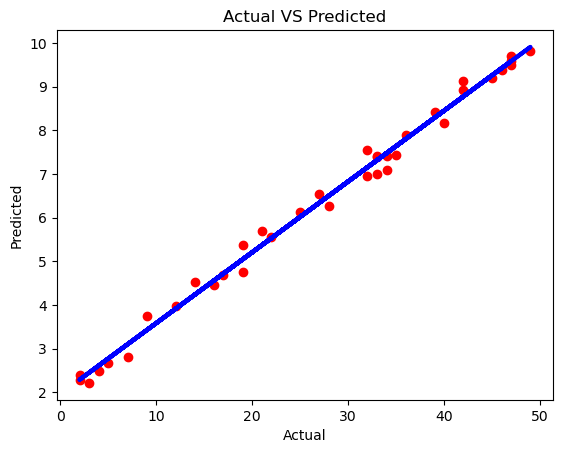

In [30]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, Y_pred_train, color='blue', linewidth=3)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')
plt.show()

In [31]:
r2_score(Y_train, Y_pred_train)

0.9924149248061614

##### Tested Data

In [32]:
Y_pred_test = slr.predict(X_test)
Y_pred_test.flatten()

array([5.20523611, 9.90684976, 7.15073142, 6.8264822 , 6.50223298,
       2.28699316, 8.12347907, 5.20523611, 7.15073142, 8.12347907,
       9.74472515, 8.60985289, 2.44911776])

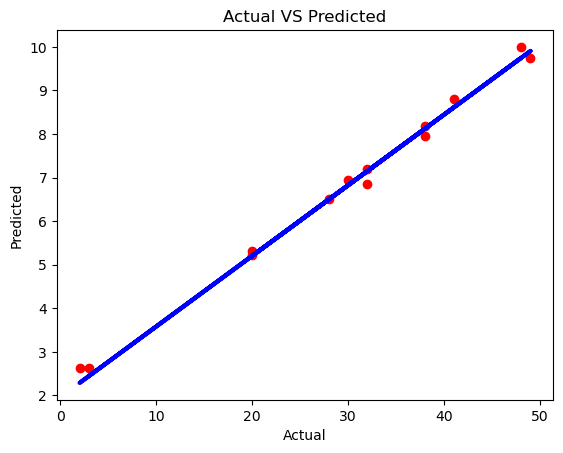

In [33]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, Y_pred_test, color='blue', linewidth=3)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')
plt.show()

In [34]:
r2_score(Y_test, Y_pred_test)

0.9933350857246259

In [35]:
pred_df = pd.DataFrame({
    'Actual Value': Y_test.ravel(),
    'Predicted Value': Y_pred_test.ravel(),
    'difference': (Y_test - Y_pred_test).ravel()
})
pred_df

,Actual Value,Predicted Value,difference
0,5.232473,5.205236,0.027237
1,9.738749,9.906850,-0.168100
2,6.844064,7.150731,-0.306668
3,6.933782,6.826482,0.107300
4,6.504953,6.502233,0.002720
5,2.632508,2.286993,0.345515
6,8.175677,8.123479,0.052198
7,5.324483,5.205236,0.119246
8,7.189215,7.150731,0.038484
9,7.966556,8.123479,-0.156924


In [36]:
new_data = np.random.randint(0,51,1)
new_data = [new_data]
slr.predict(new_data)

array([[1.96274394]])

In [37]:
# Mean Absolute Error
MAE = mean_absolute_error(Y_test, Y_pred_test)
MAE

0.15149933413849898

In [38]:
# Mean Squared Error
MSE = mean_squared_error(Y_test, Y_pred_test)
MSE

0.033710497849053396

In [39]:
# Root Mean Squared Error
RMSE = np.sqrt(MSE)
RMSE

0.18360418799431943

In [40]:
# Sum of Squared Residuals
SSR = ((Y_pred_test - Y_test)**2).sum()
SSR

0.4382364720376941

#### The difference is very less so this shows that our model is pretty accurate

# Q2

## a) Student Marks

In [41]:
np.random.seed(123)

n = 50

X1 = np.random.randint(0, 51, n)
X2 = np.random.randint(0, 51, n)
X3 = np.random.randint(0, 51, n)

Y = 2 + 0.5*X1 + 0.3*X2 + 0.1*X3 + np.random.uniform(0, 1, n)
Y = Y / np.max(Y) * 10

df = pd.DataFrame({'Marks1': X1, 'Marks2': X2, 'Marks3': X3, 'Grade': Y})

X = df.drop(columns = 'Grade')
y = df['Grade']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/4, random_state=0)
df.head()

,Marks1,Marks2,Marks3,Grade
0,45,0,30,6.774019
1,2,11,6,1.795978
2,28,34,9,6.661166
3,34,10,23,5.860491
4,38,22,14,7.046376


In [42]:
mlr = LinearRegression()

In [43]:
mlr.fit(X_train,Y_train)

LinearRegression()

In [44]:
m = mlr.coef_
m

array([0.11933828, 0.07112262, 0.02408327])

In [45]:
c = mlr.intercept_
c

0.6218907737878938

In [46]:
Y_pred_train = mlr.predict(X_train)
Y_pred_train

array([4.83086833, 5.68481183, 8.33901257, 8.48414825, 5.88514194,
       6.72953002, 7.30963565, 8.80355446, 2.14077448, 7.00032763,
       5.602761  , 5.40984923, 3.19539191, 7.51712191, 4.60317156,
       2.36350377, 8.60878121, 4.49040004, 7.78943966, 3.36544584,
       2.10628171, 1.78741579, 9.47229923, 7.61695393, 4.8386114 ,
       4.62710749, 6.11940793, 7.4415396 , 6.37925825, 6.04843266,
       8.26857511, 5.68858637, 8.3915897 , 5.94453388, 6.71461172,
       1.33777312, 7.50241916])

In [47]:
r2_score(Y_train, Y_pred_train)

0.9992218363017696

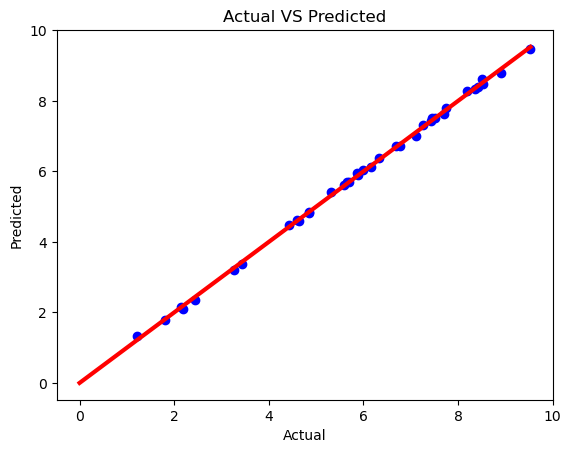

In [48]:
plt.scatter(Y_train, Y_pred_train, color = 'blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')

x = np.linspace(0, np.max(Y_train))
plt.plot(x, x, color='red', linewidth = 3)

plt.show()

In [49]:
Y_pred_test = mlr.predict(X_test)
Y_pred_test

array([ 7.57741207, 10.00827751,  7.27619094,  5.27338735,  6.5982812 ,
        2.88510156,  7.41985808,  5.06065554,  5.59558577,  7.05860897,
        9.50360685,  9.02497916,  5.49936751])

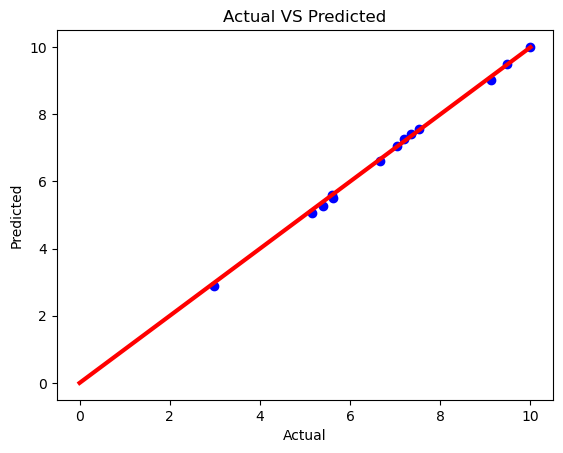

In [50]:
plt.scatter(Y_test, Y_pred_test, color = 'blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')

x = np.linspace(0, np.max(Y_test))
plt.plot(x, x, color='red', linewidth = 3)

plt.show()

In [51]:
# Mean Absolute Error
MAE = mean_absolute_error(Y_test, Y_pred_test)
MAE

0.06475549327490349

In [52]:
# Mean Squared Error
MSE = mean_squared_error(Y_test, Y_pred_test)
MSE

0.00591181822627103

In [53]:
# Root Mean Squared Error
RMSE = np.sqrt(MSE)
RMSE

0.07688834909315605

In [54]:
# Sum of Squared Residuals
SSR = ((Y_pred_test - Y_test)**2).sum()
SSR

0.07685363694152339

In [55]:
r2_score(Y_test, Y_pred_test)

0.9983315615337198

In [56]:
pred_df = pd.DataFrame({
    'Actual Value': Y_test.ravel(),
    'Predicted Value': Y_pred_test.ravel(),
    'difference': (Y_test - Y_pred_test).ravel()
})
pred_df

,Actual Value,Predicted Value,difference
0,7.527839,7.577412,-0.049573
1,10.000000,10.008278,-0.008278
2,7.197859,7.276191,-0.078332
3,5.388891,5.273387,0.115504
4,6.661166,6.598281,0.062884
5,2.973335,2.885102,0.088233
6,7.348901,7.419858,-0.070957
7,5.153617,5.060656,0.092962
8,5.597138,5.595586,0.001553
9,7.046376,7.058609,-0.012233


In [57]:
new_data = np.random.randint(0,51,3)
new_data =  np.array(new_data).reshape(-1,1)
slr.predict(new_data)

array([[3.42186542],
       [2.28699316],
       [7.96135446]])

## b) Income

In [58]:
from sklearn.datasets import fetch_openml

In [74]:
boston = fetch_openml(data_id=531)

data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['MEDV'] = boston.target

data = data.apply(pd.to_numeric)

X = data.drop('MEDV', axis=1)
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [60]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [61]:
m = mlr.coef_
m

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

In [62]:
c = mlr.intercept_
c

37.937107741833316

In [63]:
y_pred_train = mlr.predict(X_train)

In [64]:
r2_score(y_train, y_pred_train)

0.7645451026942549

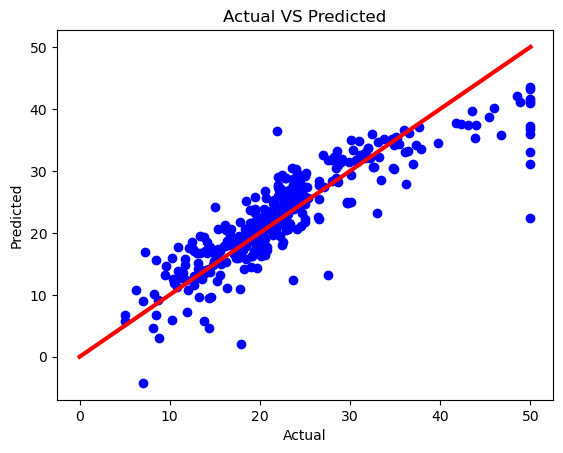

In [65]:
plt.scatter(y_train, y_pred_train, color = 'blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')
x = np.linspace(0, np.max(y_train))
plt.plot(x, x, color='red', linewidth = 3)
plt.show()

In [66]:
y_pred_test = mlr.predict(X_test)

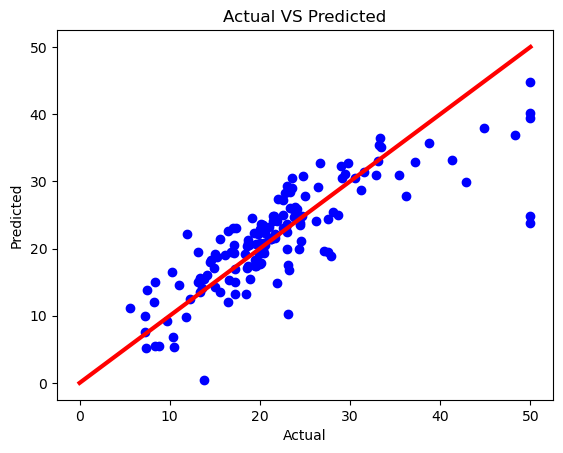

In [67]:
plt.scatter(y_test, y_pred_test, color = 'blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')
x = np.linspace(0, np.max(y_test))
plt.plot(x, x, color='red', linewidth = 3)
plt.show()

In [68]:
r2_score(y_test, y_pred_test)

0.6733825506400175

In [69]:
mae = mean_absolute_error(y_test, y_pred_test)
mae

3.6099040603818233

In [70]:
mse = mean_squared_error(y_test, y_pred_test)
mse

27.19596576688338

In [71]:
ssr = np.sum((y_pred_test - y_test.mean())**2)
ssr

8788.350994133663

In [72]:
pred_df = pd.DataFrame({
    'Actual Value': Y_test.ravel(),
    'Predicted Value': Y_pred_test.ravel(),
    'difference': (Y_test - Y_pred_test).ravel()
})
pred_df

,Actual Value,Predicted Value,difference
0,7.527839,7.577412,-0.049573
1,10.000000,10.008278,-0.008278
2,7.197859,7.276191,-0.078332
3,5.388891,5.273387,0.115504
4,6.661166,6.598281,0.062884
5,2.973335,2.885102,0.088233
6,7.348901,7.419858,-0.070957
7,5.153617,5.060656,0.092962
8,5.597138,5.595586,0.001553
9,7.046376,7.058609,-0.012233


In [73]:
new_data = np.random.randint(0,50,13)
new_data =  np.array(new_data).reshape(-1,1)
slr.predict(new_data)

array([[7.31285602],
       [2.77336698],
       [3.42186542],
       [4.39461307],
       [6.50223298],
       [2.28699316],
       [3.58399002],
       [7.79922985],
       [2.44911776],
       [9.74472515],
       [2.44911776],
       [5.69160994],
       [6.34010837]])